<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>


# Personal Data

In [ ]:
# Set your student number
student_number = 400109768
Name = 'Seyed Hamid'
Last_Name = 'Ghasemi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:03<00:00, 7493649.17it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 340982.95it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6198128.80it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15749290.29it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [97]:
## FILL HERE
# input_dim = .....
num_classes = len(train_set.classes)
input_dim = train_set[0][0].numel()
print("number of classes= ",num_classes)
print("input dimention of the first layer= ",input_dim)

number of classes=  10
input dimention of the first layer=  784


In [98]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

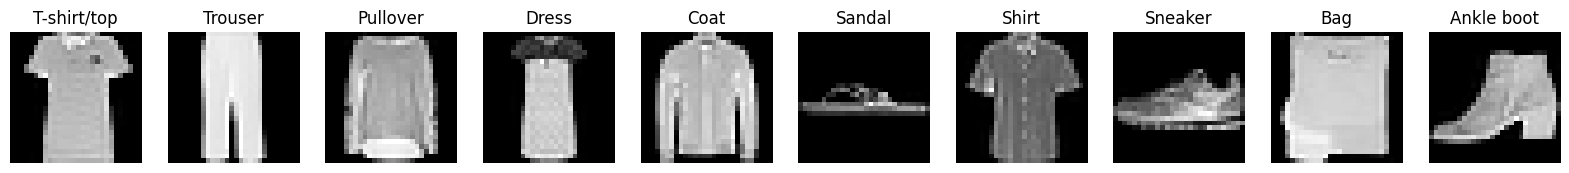

In [78]:
# Create a figure with the number of subplots equal to the number of classes
fig, axs = plt.subplots(nrows=1, ncols=num_classes, figsize=(20, 5))

# Iterate over each class and load a random image from that class
for i in range(num_classes):
    # Load a random image from the class
    img = test_set[np.random.choice(np.where(test_set.targets == i)[0])]
    img = img[0].numpy().transpose((1, 2, 0))
    axs[i].imshow(img, cmap='gray')

    # Set the title of the subplot
    axs[i].set_title(test_set.classes[i])
    axs[i].axis('off')
# Show the plot
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [79]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [99]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [54]:
def affine_forward(x, w, b):
    ## FILL HERE
    return (torch.matmul(x, w) + b)


def relu(x):
    ## FILL HERE
    return torch.where(x > 0, x, torch.zeros_like(x))

Function `model` returns output of the whole model for the input `x` using the parameters:

In [74]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    ## FILL HERE
    # Iterate over each layer
    for i in range(num_layers):
        # Get the weights and bias for the current layer
        w = parameters['w' + str(i)]
        b = parameters['b' + str(i)]

        # Compute the affine output
        x = affine_forward(x, w, b)

        # Apply the ReLU activation function
        if i != num_layers - 1:
          x = relu(x)

    output = x
    return output

Implementing cross entropy loss:

In [56]:
def cross_entropy_loss(scores, y):
    n = len(y)
    ## FILL HERE
    scores = torch.exp(scores)
    scores_sum = torch.sum(scores, dim=1, keepdim=True)
    scores = scores / scores_sum
    loss = -scores[range(n), y].log().sum() / n
    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [57]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    ## FILL HERE
    with torch.no_grad():
        for param in parameters.values():
            if param.requires_grad:
                param -= learning_rate * param.grad
                param.grad.clamp_(-1, 1)
    for param in parameters.values():
            if param.grad is not None:
                param.grad.zero_()

Training functions:

In [100]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    return (y_pred == y_true).sum().item() / len(y_true)

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        loss = cross_entropy_loss(p, y)
        loss.backward()
        sgd_optimizer(parameters, learning_rate)
        loss =  loss.item() * x.size(0)
        train_loss = train_loss + loss
        ## I commented this line to display the data better
        #print(f'Loss of train set @ batch({i+1}) & epoch({epoch+1}): {loss}')

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Loss of train set: {train_loss}')
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        loss = cross_entropy_loss(p, y)
        total_loss = total_loss + loss.item() * x.size(0)
        ## I commented this line to display the data better
        # print(f'Loss of {set_name} set @ batch({i+1}): {loss}')
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Loss of {set_name} set: {total_loss}')
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [101]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [103]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`
        print("epoch:",epoch+1)
        train_loss, train_accuracy = train(train_loader, learning_rate, epoch)
        test_loss, test_accuracy = validate(test_loader, epoch, "Test")
        print()
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)


    ## plot the loss history of training and test sets
    ## FILL HERE
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_losses, 'o-', label='Training Loss', color='blue')
    plt.plot(range(1, num_epochs + 1), test_accuracies, 'o-', label='Test Loss', color='red')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.title('Loss History', fontsize=16)
    plt.legend(fontsize=14)
    plt.xticks(range(1, num_epochs + 1))
    plt.grid(True)
    plt.show()

    ## plot the accuracy history of training and test sets
    ## FILL HERE
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1),train_accuracies, 'o-', label='Training Accuracy', color='blue')
    plt.plot(range(1, num_epochs + 1),test_accuracies, 'o-', label='Test Accuracy', color='red')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Accuracy History', fontsize=16)
    plt.legend(fontsize=14)
    plt.xticks(range(1, num_epochs + 1))
    plt.grid(True)
    plt.show()

epoch: 1
Loss of train set: 137325.19330596924
Accuracy of train set: 0.3329
Loss of Test set: 13.601729974365234
Accuracy of Test set: 0.3679
epoch: 2
Loss of train set: 124549.13872528076
Accuracy of train set: 0.33698333333333336
Loss of Test set: 9.896526405715942
Accuracy of Test set: 0.37828333333333336
epoch: 3
Loss of train set: 77332.0484008789
Accuracy of train set: 0.5236333333333333
Loss of Test set: 6.34036166305542
Accuracy of Test set: 0.5741
epoch: 4
Loss of train set: 56762.9960899353
Accuracy of train set: 0.6258333333333334
Loss of Test set: 5.1091954015731815
Accuracy of Test set: 0.6843666666666667
epoch: 5
Loss of train set: 47618.10361099243
Accuracy of train set: 0.6944
Loss of Test set: 4.50027910270691
Accuracy of Test set: 0.72225
epoch: 6
Loss of train set: 42528.63914680481
Accuracy of train set: 0.7329333333333333
Loss of Test set: 4.428656952857971
Accuracy of Test set: 0.7361833333333333
epoch: 7
Loss of train set: 39391.592319488525
Accuracy of train se

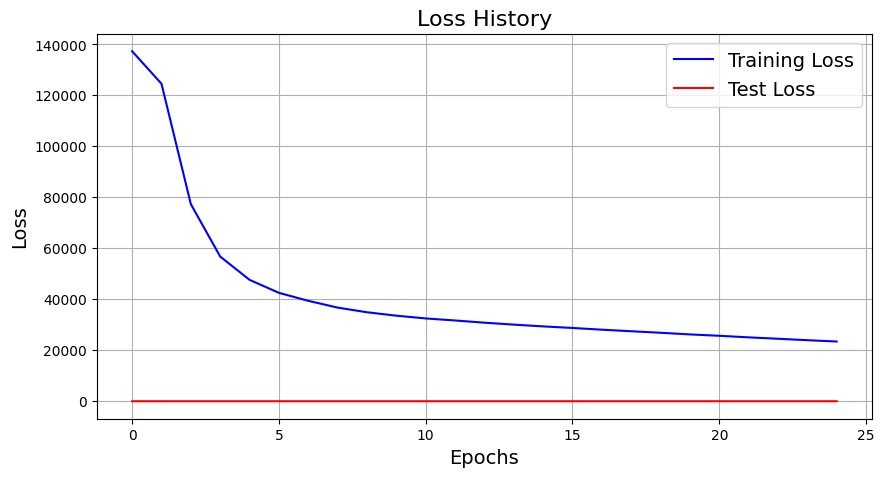

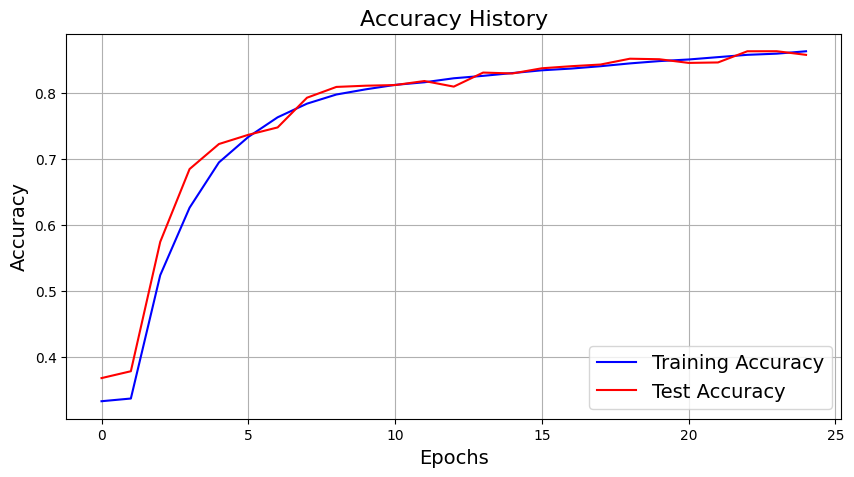

In [104]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [111]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8572333333333333


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

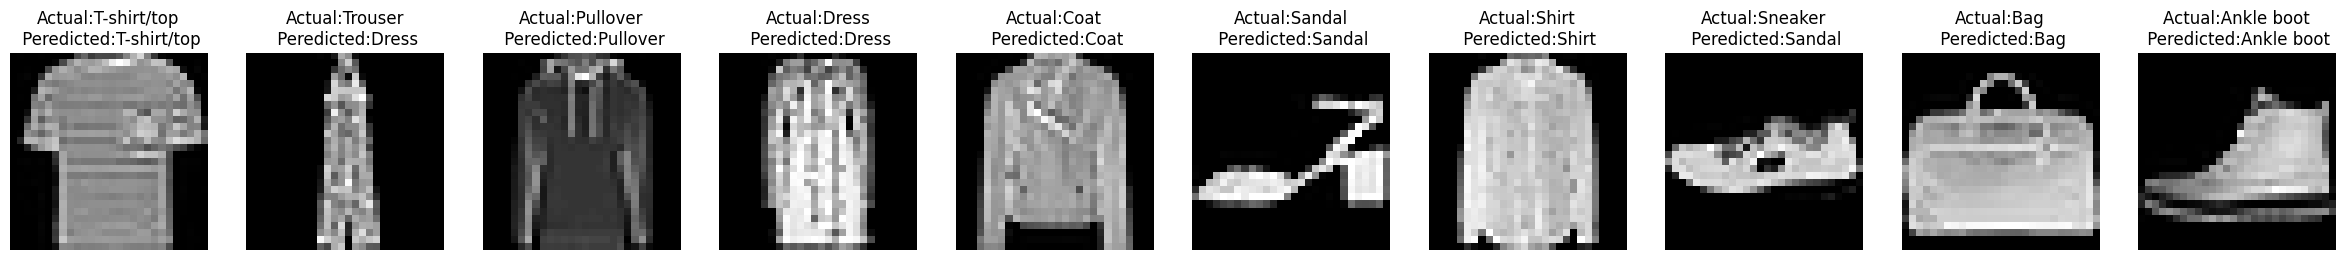

In [129]:
## FILL HERE
# Create a figure with the number of subplots equal to the number of classes
fig, axs = plt.subplots(nrows=1, ncols=num_classes, figsize=(30, 7))

# Iterate over each class and load a random image from that class
for i in range(num_classes):
    # Load a random image from the class
    random_index = np.random.choice(np.where(test_set.targets == i)[0])
    main_img = test_set[random_index]
    img = main_img[0].numpy().transpose((1, 2, 0))
    axs[i].imshow(img, cmap='gray')

    ## Perediction:
    with torch.no_grad():
      class_predictions = model(main_img[0].to(device), parameters)
      predicted_labels = torch.argmax(class_predictions, dim=1).cpu().numpy()


    # Set the title of the subplot
    title = "Actual:"+str(test_set.classes[i])+"\n Peredicted:"+str(test_set.classes[predicted_labels[0]])
    axs[i].set_title(title)
    axs[i].axis('off')
# Show the plot
plt.show()